# Introduction to Machine Learning – Project 2025

Group Information

Student #1

Full Name: Heni Beya

Student #2

Full Name: Hadile Kerrit

Student #3

Full Name: Hugo Mochet

Project Contribution

Task Distribution:

Heni Beya :
Model development
Business analysis
Visualizations

Hadile Kerrit :
Recommendations
Feature engineering
Dataset selection

Hugo Mochet:
Exploratory data analysis
Model evaluation
Data preprocessing

## Dataset: Customer Churn

This notebook corresponds to the project instructions.

We chose **Dataset A: Churn Data** (from `ChurnData.csv`).

We will follow the required steps:


1. Dataset selection and problem definition

2. Scenario / about the dataset

3. Data loading and summary

4. Data wrangling / preprocessing

5. Exploratory Data Analysis (EDA)

6. Model development (multiple ML algorithms)

7. Model evaluation (metrics & plots)

8. Model refinement and conclusions



## Step 2 – Scenario / About the Dataset

You are working as a **data analyst** for a telecom company.

The company wants to understand and **predict customer churn** (whether a customer is likely to leave).


**Goal:** build a machine learning solution that, based on customer attributes (tenure, income, services, etc.),

predicts whether the customer will churn.


**Type of problem:** this is a **supervised classification** problem because:

- The target variable `churn` takes discrete values (0 = no churn, 1 = churn).

- We want to assign each customer to one of these classes.



## Step 3 – Data Loading and Description

In [19]:

import pandas as pd

# Load churn dataset
df = pd.read_csv("ChurnData.csv")

# Basic info
df.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [20]:

# Shape of the data (rows, columns)
df.shape


(200, 28)

In [21]:

# Column names and data types
df.dtypes


tenure      float64
age         float64
address     float64
income      float64
ed          float64
employ      float64
equip       float64
callcard    float64
wireless    float64
longmon     float64
tollmon     float64
equipmon    float64
cardmon     float64
wiremon     float64
longten     float64
tollten     float64
cardten     float64
voice       float64
pager       float64
internet    float64
callwait    float64
confer      float64
ebill       float64
loglong     float64
logtoll     float64
lninc       float64
custcat     float64
churn       float64
dtype: object

In [22]:

# Basic statistics for numerical features
df.describe()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.00000,200.000000,200.000000,200.000000,200.00000,...,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,35.505000,41.165000,11.650000,75.130000,2.82500,10.22500,0.425000,0.705000,0.290000,11.78925,...,0.275000,0.440000,0.45500,0.460000,0.440000,2.193285,3.229185,3.951015,2.475000,0.290000
std,21.640971,13.076803,10.158419,128.430468,1.28555,8.95743,0.495584,0.457187,0.454901,9.88725,...,0.447635,0.497633,0.49922,0.499648,0.497633,0.731282,0.281019,0.752553,1.079445,0.454901
min,1.000000,19.000000,0.000000,9.000000,1.00000,0.00000,0.000000,0.000000,0.000000,1.10000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.095000,1.749000,2.197000,1.000000,0.000000
25%,16.750000,31.000000,3.000000,31.000000,2.00000,3.00000,0.000000,0.000000,0.000000,5.53750,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.711750,3.226500,3.434000,2.000000,0.000000
50%,33.500000,40.000000,9.000000,48.000000,3.00000,7.50000,0.000000,1.000000,0.000000,8.25000,...,0.000000,0.000000,0.00000,0.000000,0.000000,2.110000,3.240000,3.871000,2.000000,0.000000
75%,55.250000,51.000000,18.000000,80.000000,4.00000,17.00000,1.000000,1.000000,1.000000,14.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,2.660000,3.240000,4.382000,3.000000,1.000000
max,72.000000,76.000000,48.000000,1668.000000,5.00000,44.00000,1.000000,1.000000,1.000000,62.30000,...,1.000000,1.000000,1.00000,1.000000,1.000000,4.132000,4.227000,7.419000,4.000000,1.000000


### Short description of the attributes
Below is an example description; you can adapt the wording if needed:

- `tenure`: Number of months the customer has been with the company.

- `age`: Age of the customer.

- `address`: Related to how long the customer has lived at the current address.

- `income`: Normalized income indicator.

- `ed`: Education level.

- `employ`: Years of employment.

- `equip`: Type or presence of company equipment.

- `callcard`, `wireless`, `voice`, `pager`, `internet`: Usage or subscription indicators for different services.

- `longmon`, `tollmon`, `equipmon`, `cardmon`, `wiremon`: Monthly billing amounts for different services.

- `longten`, `tollten`, `cardten`: Tenure-related metrics for different services.

- `callwait`, `confer`, `ebill`: Service features (call waiting, conference, electronic billing).

- `loglong`, `logtoll`, `lninc`: Log-transformed numeric features.

- `custcat`: Customer category (segment).

- `churn`: Target variable (1 = churn, 0 = no churn).



## Step 4 – Data Wrangling / Pre‑processing

In [23]:

# Check for missing values
df.isna().sum()


tenure      0
age         0
address     0
income      0
ed          0
employ      0
equip       0
callcard    0
wireless    0
longmon     0
tollmon     0
equipmon    0
cardmon     0
wiremon     0
longten     0
tollten     0
cardten     0
voice       0
pager       0
internet    0
callwait    0
confer      0
ebill       0
loglong     0
logtoll     0
lninc       0
custcat     0
churn       0
dtype: int64

In [24]:

# Example: handle missing values (if any)
# - For numerical columns: fill with median
# - For categorical columns: fill with mode

import numpy as np

num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "bool"]).columns.tolist()

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])
    
df.isna().sum().head()


tenure     0
age        0
address    0
income     0
ed         0
dtype: int64

In [25]:

# Separate features X and target y
target_col = "churn"
X = df.drop(columns=[target_col])
y = df[target_col]

X.head()


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0


In [26]:

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((140, 27), (60, 27))

In [27]:

# Scaling numerical features (many models work better with scaled data)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Summary of preprocessing:**
- Checked and imputed missing values.
- Split data into training and test sets.
- Scaled numerical features for the models.


## Step 5 – Exploratory Data Analysis (EDA)

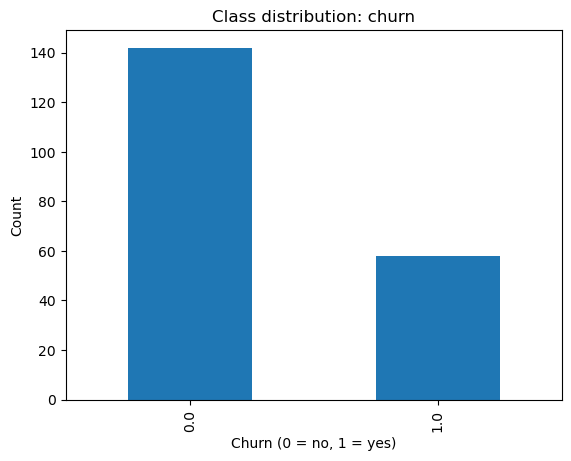

In [28]:

import matplotlib.pyplot as plt

# Distribution of target variable (churn)
y.value_counts().plot(kind='bar')
plt.title('Class distribution: churn')
plt.xlabel('Churn (0 = no, 1 = yes)')
plt.ylabel('Count')
plt.show()


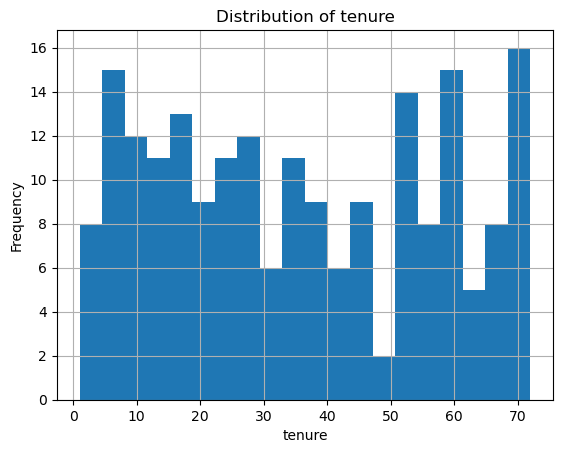

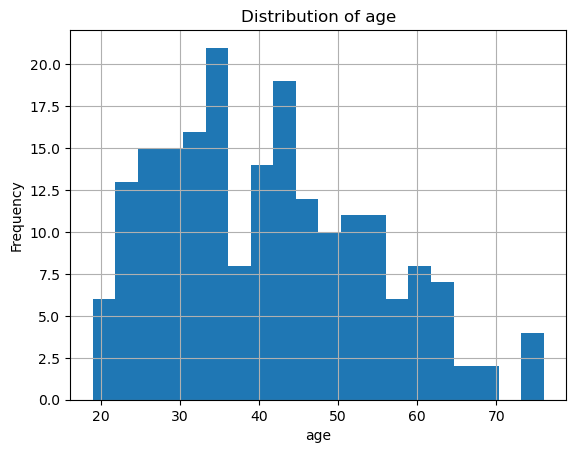

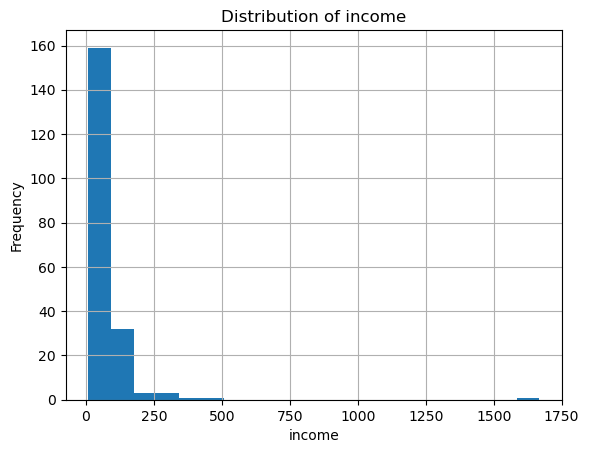

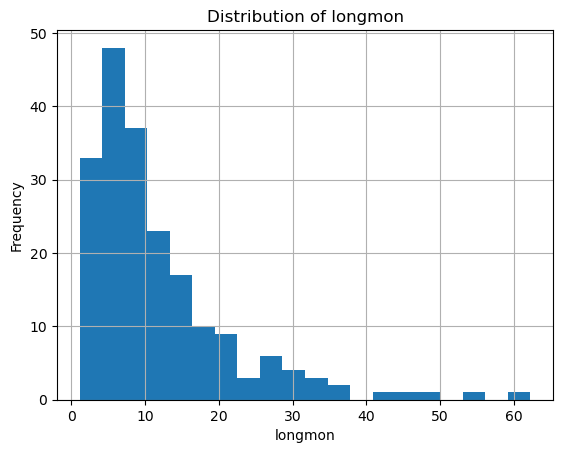

In [29]:

# Example: histogram of a few important numeric features
cols_to_plot = ["tenure", "age", "income", "longmon"]

for col in cols_to_plot:
    df[col].hist(bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


In [30]:

# Correlation matrix (numeric features only)
import numpy as np

corr = df.corr(numeric_only=True)
corr


,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
tenure,1.000000,0.431802,0.456328,0.109383,-0.070503,0.445755,-0.117102,0.426530,-0.070590,0.763134,...,0.018791,-0.164921,-0.009747,0.080650,-0.099128,0.864388,0.310045,0.246353,0.134237,-0.376860
age,0.431802,1.000000,0.746566,0.211275,-0.071509,0.622553,-0.071357,0.170404,-0.065527,0.373547,...,0.006803,-0.078395,0.020002,0.030625,-0.048279,0.379413,0.093600,0.313359,0.041055,-0.287697
address,0.456328,0.746566,1.000000,0.132807,-0.145550,0.520926,-0.148977,0.209204,-0.146478,0.421782,...,-0.105812,-0.191058,-0.019967,-0.030494,-0.172171,0.409357,0.018386,0.212929,-0.016841,-0.260659
income,0.109383,0.211275,0.132807,1.000000,0.141241,0.345161,-0.010741,-0.019969,-0.029635,0.041808,...,0.056977,0.102809,0.081133,-0.031556,-0.041392,0.065595,-0.156498,0.680313,0.030725,-0.090790
ed,-0.070503,-0.071509,-0.145550,0.141241,1.000000,-0.213886,0.488041,-0.071178,0.267670,-0.072735,...,0.258698,0.552996,-0.016247,-0.132215,0.427315,-0.054581,-0.007227,0.206718,0.013127,0.216112
employ,0.445755,0.622553,0.520926,0.345161,-0.213886,1.000000,-0.174470,0.266612,-0.101187,0.363386,...,0.038381,-0.250044,0.119708,0.173247,-0.151965,0.377186,0.068718,0.540052,0.131292,-0.337969
equip,-0.117102,-0.071357,-0.148977,-0.010741,0.488041,-0.174470,1.000000,-0.087051,0.386735,-0.097618,...,0.308633,0.623509,-0.034021,-0.103499,0.603133,-0.113065,-0.027882,0.083494,0.174955,0.275284
callcard,0.426530,0.170404,0.209204,-0.019969,-0.071178,0.266612,-0.087051,1.000000,0.220118,0.322514,...,0.251069,-0.067146,0.370878,0.311056,-0.045058,0.351030,0.080060,0.156920,0.407553,-0.311451
wireless,-0.070590,-0.065527,-0.146478,-0.029635,0.267670,-0.101187,0.386735,0.220118,1.000000,-0.073043,...,0.667535,0.343631,0.389670,0.382925,0.321433,-0.042637,0.178317,0.033558,0.598156,0.174356
longmon,0.763134,0.373547,0.421782,0.041808,-0.072735,0.363386,-0.097618,0.322514,-0.073043,1.000000,...,-0.001372,-0.223929,0.032913,0.060614,-0.124605,0.901631,0.247302,0.122550,0.072519,-0.292026


In [31]:

# Simple visualization of correlations with churn
corr_with_churn = corr['churn'].sort_values(ascending=False)
corr_with_churn


churn       1.000000
equip       0.275284
equipmon    0.255348
internet    0.254838
ebill       0.254838
ed          0.216112
wiremon     0.177483
wireless    0.174356
voice       0.142315
pager       0.124623
custcat     0.014839
tollmon     0.014356
callwait   -0.052885
tollten    -0.059482
logtoll    -0.070156
confer     -0.081361
income     -0.090790
lninc      -0.117459
cardmon    -0.177163
cardten    -0.228634
address    -0.260659
age        -0.287697
longmon    -0.292026
longten    -0.294906
callcard   -0.311451
loglong    -0.336869
employ     -0.337969
tenure     -0.376860
Name: churn, dtype: float64

**Key findings (to be adapted after running the notebook):**
- Some features such as tenure, income, and long distance usage may correlate with churn.
- Class distribution may be slightly imbalanced (depending on counts).
- Certain service-related features (e.g. `ebill`, `internet`) might be associated with higher or lower churn.


## Step 6 – Model Development
 We will train **multiple machine learning algorithms**:
- Logistic Regression (baseline, commonly taught in class).
- Random Forest Classifier.
- Gradient Boosting Classifier (often more advanced, may qualify as “not taught in class”).


In [32]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

trained_models = {}

for name, clf in models.items():
    clf.fit(X_train_scaled, y_train)
    trained_models[name] = clf
    print(f"Trained: {name}")


Trained: Logistic Regression
Trained: Random Forest
Trained: Gradient Boosting


## Step 7 – Model Evaluation

In [34]:

import pandas as pd

results_df = pd.DataFrame(results)
results_df


,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.716667,0.500000,0.235294,0.320000,0.767442
1,Random Forest,0.750000,0.625000,0.294118,0.400000,0.789330
2,Gradient Boosting,0.766667,0.714286,0.294118,0.416667,0.755130


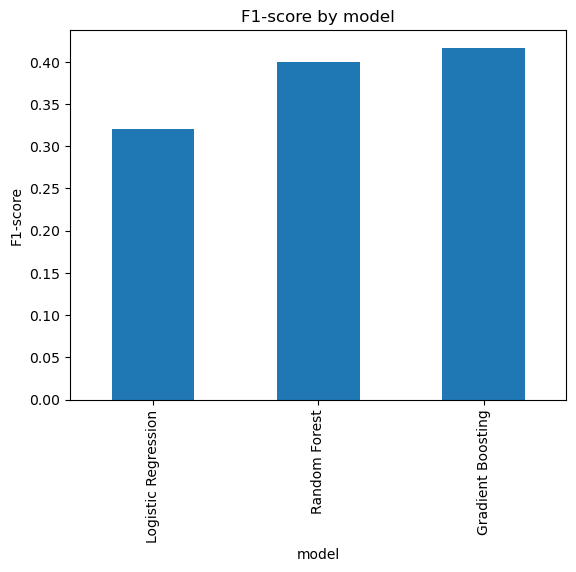

In [35]:

# Optional: simple bar plot of F1-score by model
results_df.set_index("model")["f1"].plot(kind="bar")
plt.title("F1-score by model")
plt.ylabel("F1-score")
plt.show()


# Step 8 – Model Refinement & Conclusions

## 1. Model Comparison and Interpretation

On the held-out test set:

- **Gradient Boosting** achieved the **best F1-score**: **0.4167**, and the **highest accuracy**: **0.7667**.
- **Random Forest** obtained the **best ROC AUC**: **0.7893**, making it the strongest in ranking churn risk.
- **Logistic Regression** performed reasonably with **F1 = 0.3200** and **ROC AUC = 0.7674**.

### Precision–Recall Trade-off

There is a clear trade-off between precision and recall:

- Logistic Regression tends to have **higher precision but lower recall**.
- Gradient Boosting gives a **better F1** by capturing more churners (higher recall).
- ROC AUC values above 0.75 show that all models rank churn probability well, but **threshold tuning remains essential**.

Because the business goal is to **detect as many churners as possible**, **recall and F1-score** are more important than accuracy.

---

## 2. Recommended Model Choice

- **Gradient Boosting** is recommended as the primary model because it has the best F1-score and best balance between precision and recall.
- **Random Forest** can be used as an alternative when prioritizing **overall ranking quality** (ROC AUC).

---

## 3. Refinement Plan

### a. Hyperparameter Tuning (GridSearchCV / RandomizedSearchCV)
- **Gradient Boosting:** `learning_rate`, `n_estimators`, `max_depth`
- **Random Forest:** `n_estimators`, `max_depth`, `min_samples_leaf`
- **Logistic Regression:** `C`, `penalty`, `solver`

### b. Decision Threshold Tuning
Instead of using the default 0.5 threshold:

- Sweep thresholds manually using `predict_proba`
- Or use `TunedThresholdClassifierCV`
- Optimize for **F1-score** or **Recall** depending on the business goal

### c. Class Imbalance Management
If the churn class is underrepresented:

- Use `class_weight='balanced'` (Logistic Regression, RF, GB)
- Optionally use resampling (SMOTE or undersampling)

### d. Post-Tuning Evaluation
Generate:

- Confusion matrix
- ROC curve
- Precision–Recall curve
- Summary table of Accuracy / Precision / Recall / F1 / ROC AUC

---

## 4. Limitations

- Dataset size and quality may limit the model’s generalization ability.
- Some churn factors may be missing (service quality, competitor offers, satisfaction).
- Models assume future behavior is similar to historical data, which may not always hold.

---

## 5. Final Recommendation

1. Deploy **Gradient Boosting** as the primary churn prediction model.
2. **Tune the decision threshold** to increase recall and maximize retention impact.
3. Use predictions to:
   - Identify high-risk customers (> 0.7 churn probability)
   - Target them with personalized retention campaigns
4. Retrain and monitor the model regularly as new data becomes available.

---
